In [26]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [27]:
# Define Paths
PROJECT_DIR_PATH = Path.cwd()
DATA_DIR_PATH = PROJECT_DIR_PATH / "data"

In [28]:
# Set Korean font for Windows
plt.rcParams['font.family'] = 'Malgun Gothic'  # or 'NanumGothic' if installed
plt.rcParams['axes.unicode_minus'] = False

In [29]:
## First reading data dict_to raw data for more visibility
df = pd.read_excel(DATA_DIR_PATH / "(HRC250611) 2023년 수원서베이 용역_공개용 데이터(엑셀).xlsx")
df.head()

,Unnamed: 0,총 가구원 수,출생년도1,출생년도2,출생년도3,출생년도4,출생년도5,출생년도6,코드1,코드2,...,현재 집 거주 기간,주택 유형,주택 점유 형태,직업,월평균 가구소득,경제사회적 위치,정치성향,정책 관심도,시민의견 수렴 정도,수원시정 만족도
0,PID,totgagu1s,birth1,birth2,birth3,birth4,birth5,birth6,choice1,choice2,...,DM8,DM9,DM10,DM101,DM11,DM12,DM13,ADD1,ADD2,ADD3
1,50,3,1966,1968,1995,NaN,NaN,NaN,1,NaN,...,1,2,1,2,7,2,2,2,1,3
2,51,2,1958,1963,NaN,NaN,NaN,NaN,1,NaN,...,1,2,1,3,7,3,1,2,2,3
3,52,2,1996,1996,NaN,NaN,NaN,NaN,1,NaN,...,1,2,1,2,6,3,2,2,2,3
4,53,3,1989,1986,2020,NaN,NaN,NaN,1,NaN,...,1,2,1,4,5,3,2,2,2,3


In [30]:
with open(DATA_DIR_PATH / "variable_dictionary.json", "r", encoding="utf-8") as f:
    var_dict = json.load(f)

var_dict

{'relat1': {'description': '가구주와의 관계1',
  'values': {'1.0': '가구주',
   '2.0': '배우자',
   '3.0': '미혼 자녀',
   '4.0': '기혼자녀 및 그 배우자',
   '5.0': '손자녀 및 그 배우자',
   '6.0': '부모(장인, 장모 시부모)',
   '7.0': '조부모',
   '8.0': '미혼형제, 자매',
   '9.0': '기타'}},
 'relat2': {'description': '가구주와의 관계2',
  'values': {'1.0': '가구주',
   '2.0': '배우자',
   '3.0': '미혼 자녀',
   '4.0': '기혼자녀 및 그 배우자',
   '5.0': '손자녀 및 그 배우자',
   '6.0': '부모(장인, 장모 시부모)',
   '7.0': '조부모',
   '8.0': '미혼형제, 자매',
   '9.0': '기타'}},
 'relat3': {'description': '가구주와의 관계3',
  'values': {'1.0': '가구주',
   '2.0': '배우자',
   '3.0': '미혼 자녀',
   '4.0': '기혼자녀 및 그 배우자',
   '5.0': '손자녀 및 그 배우자',
   '6.0': '부모(장인, 장모 시부모)',
   '7.0': '조부모',
   '8.0': '미혼형제, 자매',
   '9.0': '기타'}},
 'relat4': {'description': '가구주와의 관계4',
  'values': {'1.0': '가구주',
   '2.0': '배우자',
   '3.0': '미혼 자녀',
   '4.0': '기혼자녀 및 그 배우자',
   '5.0': '손자녀 및 그 배우자',
   '6.0': '부모(장인, 장모 시부모)',
   '7.0': '조부모',
   '8.0': '미혼형제, 자매',
   '9.0': '기타'}},
 'relat5': {'description': '가구주와의 관계5',
  'v

In [31]:
# Set the first row as column headers
questions = df.columns

df.columns = df.iloc[0]

# Drop the first row from the dataset
df = df[1:].reset_index(drop=True)
df

,PID,totgagu1s,birth1,birth2,birth3,birth4,birth5,birth6,choice1,choice2,...,DM8,DM9,DM10,DM101,DM11,DM12,DM13,ADD1,ADD2,ADD3
0,50,3,1966,1968,1995,NaN,NaN,NaN,1,NaN,...,1,2,1,2,7,2,2,2,1,3
1,51,2,1958,1963,NaN,NaN,NaN,NaN,1,NaN,...,1,2,1,3,7,3,1,2,2,3
2,52,2,1996,1996,NaN,NaN,NaN,NaN,1,NaN,...,1,2,1,2,6,3,2,2,2,3
3,53,3,1989,1986,2020,NaN,NaN,NaN,1,NaN,...,1,2,1,4,5,3,2,2,2,3
4,54,3,1981,1976,2013,NaN,NaN,NaN,1,NaN,...,1,1,2,3,6,3,2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2446,1,1986,NaN,NaN,NaN,NaN,NaN,1,NaN,...,1,1,2,2,3,1,2,3,3,3
2037,2447,3,1963,1967,1991,NaN,NaN,NaN,NaN,NaN,...,3,1,1,2,7,2,3,2,3,3
2038,2448,2,1950,1951,NaN,NaN,NaN,NaN,NaN,2,...,3,2,1,4,1,2,1,2,2,3
2039,2449,3,1969,1971,1992,NaN,NaN,NaN,1,NaN,...,2,2,1,2,4,3,2,2,2,3


In [32]:
for col, metadata in var_dict.items():
    if col in df.columns:
        mapping = {float(k): v for k, v in metadata['values'].items()}
        df[col] = df[col].astype(float).map(mapping)


In [33]:
df.head()

,PID,totgagu1s,birth1,birth2,birth3,birth4,birth5,birth6,choice1,choice2,...,DM8,DM9,DM10,DM101,DM11,DM12,DM13,ADD1,ADD2,ADD3
0,50,3,1966,1968,1995,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,화이트칼라,700만원 이상,중간,중도,보통,미반영,만족
1,51,2,1958,1963,NaN,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,블루칼라,700만원 이상,상위,보수,보통,보통,만족
2,52,2,1996,1996,NaN,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,화이트칼라,600~700만원 미만,상위,중도,보통,보통,만족
3,53,3,1989,1986,2020,NaN,NaN,NaN,1,NaN,...,5년 미만,단독주택,자가,기타,500~600만원 미만,상위,중도,보통,보통,만족
4,54,3,1981,1976,2013,NaN,NaN,NaN,1,NaN,...,5년 미만,아파트,전세,블루칼라,600~700만원 미만,상위,중도,관심 없음,보통,만족


In [34]:

new_row_df = pd.DataFrame([questions], columns=df.columns)

# Add to the top of your existing DataFrame
df = pd.concat([new_row_df, df], ignore_index=True)

# ✅ Now df has your list at index 0

In [35]:
# First rows are questions and column names are variable codes 

df.tail()

,PID,totgagu1s,birth1,birth2,birth3,birth4,birth5,birth6,choice1,choice2,...,DM8,DM9,DM10,DM101,DM11,DM12,DM13,ADD1,ADD2,ADD3
2037,2446,1,1986,NaN,NaN,NaN,NaN,NaN,1,NaN,...,5년 미만,아파트,전세,화이트칼라,300~400만원 미만,하위,중도,관심 많음,반영,만족
2038,2447,3,1963,1967,1991,NaN,NaN,NaN,NaN,NaN,...,10~20년 미만,아파트,자가,화이트칼라,700만원 이상,중간,진보,보통,반영,만족
2039,2448,2,1950,1951,NaN,NaN,NaN,NaN,NaN,2,...,10~20년 미만,단독주택,자가,기타,200만원 미만,중간,보수,보통,보통,만족
2040,2449,3,1969,1971,1992,NaN,NaN,NaN,1,NaN,...,5~10년 미만,단독주택,자가,화이트칼라,400~500만원 미만,상위,중도,보통,보통,만족
2041,2450,3,1968,1972,1995,NaN,NaN,NaN,1,NaN,...,5년 미만,아파트,전세,화이트칼라,400~500만원 미만,상위,보수,보통,보통,만족


In [36]:
df.shape

(2042, 406)

---

In [37]:
### Mode-Specific Satisfaction
import matplotlib.pyplot as plt
import seaborn as sns


def plot_heatmap(var1, var2, normalize=False, title=None):
    ct = pd.crosstab(df[var1][1:], df[var2][1:], normalize='index' if normalize else False)
    plt.figure(figsize=(10, 6))
    sns.heatmap(ct, annot=True, fmt=".2f" if normalize else "d", cmap="YlGnBu")
    plt.title(f"{df[var1][0]} vs {df[var2][0]}")
    plt.xlabel(var2)
    plt.ylabel(var1)
    plt.tight_layout()
    plt.show()
    
def plot_box(var1, var2, title=None):
    # var1 should be the categorical variable (e.g., group)
    # var2 should be the numeric variable (e.g., commute time in minutes)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var1][1:], y=df[var2][1:])
    
    # Use custom title if provided, otherwise build it from column labels
    plot_title = title if title else f"{df[var1][0]} vs {df[var2][0]}"
    plt.title(plot_title)
    plt.xlabel(df[var1][0])
    plt.ylabel(df[var2][0])
    plt.xticks(rotation=45)  # Rotates labels 45 degrees
    plt.tight_layout()
    plt.show()


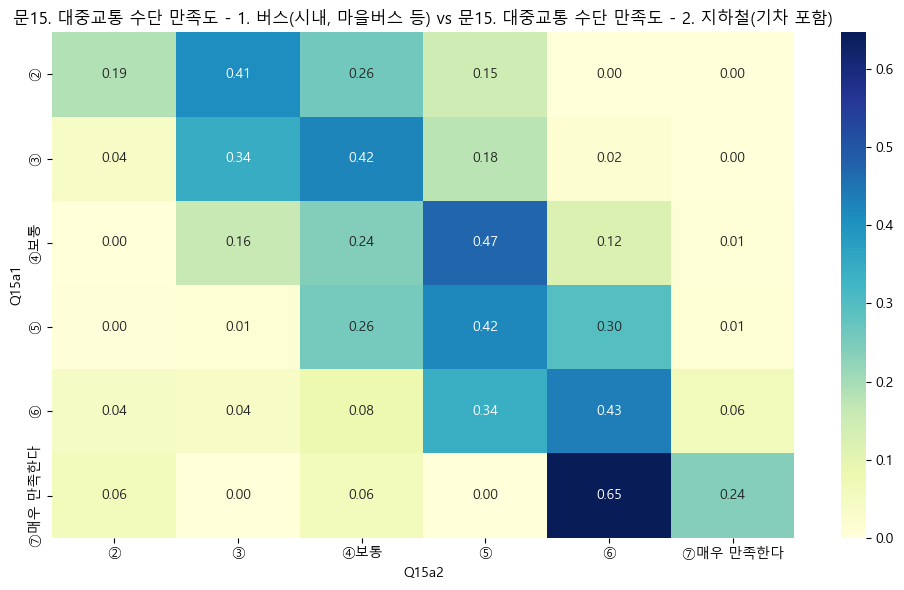

In [38]:
plot_heatmap("Q15a1", "Q15a2",normalize=True)

In [39]:
df.loc[0, "Q17_3"] = "총 통근·통학 시간 (분)"
df["Q17_3a1"][1:] = df["Q17_3a1"][1:].fillna(0).astype(float)
df["Q17_3a2"][1:] = df["Q17_3a2"][1:].fillna(0).astype(float)

# Total minutes: hours * 60 + minutes
df["Q17_3"][1:] = df["Q17_3a1"][1:] * 60 + df["Q17_3a2"][1:]



C:\Users\wsm\AppData\Local\Temp\ipykernel_21428\1907959041.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.loc[0, "Q17_3"] = "총 통근·통학 시간 (분)"
C:\Users\wsm\AppData\Local\Temp\ipykernel_21428\1907959041.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Q17_3a1"][1:] = df["Q17_3a1"][1:].fillna(0).astype(float)
C:\Users\wsm\AppData\Local\Temp\ipykernel_21428\1907959041.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain c

In [40]:
df=df.drop(columns= ["Q17_3a1","Q17_3a2"])

----

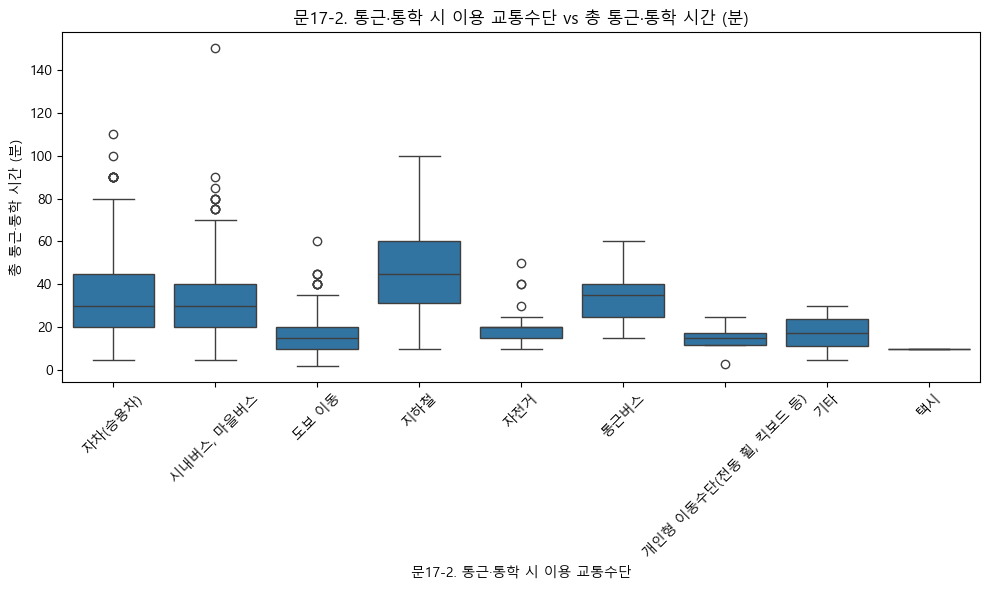

In [41]:
plot_box("Q17_2","Q17_3")

----

In [42]:
df["Q17_5"][1:].value_counts(ascending=False)

Q17_5
도로 혼잡                     531
대중교통 운행횟수 부족(배차간격)        227
차내 혼잡                     221
주차공간 부족                   218
긴 통행거리                    131
높은 이용요금                    78
많은 환승 횟수                   62
기타                         55
개인형 이동수단 반납장소 및 거치대 미흡     50
Name: count, dtype: int64

In [43]:
df["Q17_5op"][1:].value_counts(ascending=False)

Q17_5op
없음               50
없다                3
인도  적재물진열         1
도로  주차로  교통체증     1
Name: count, dtype: int64

---

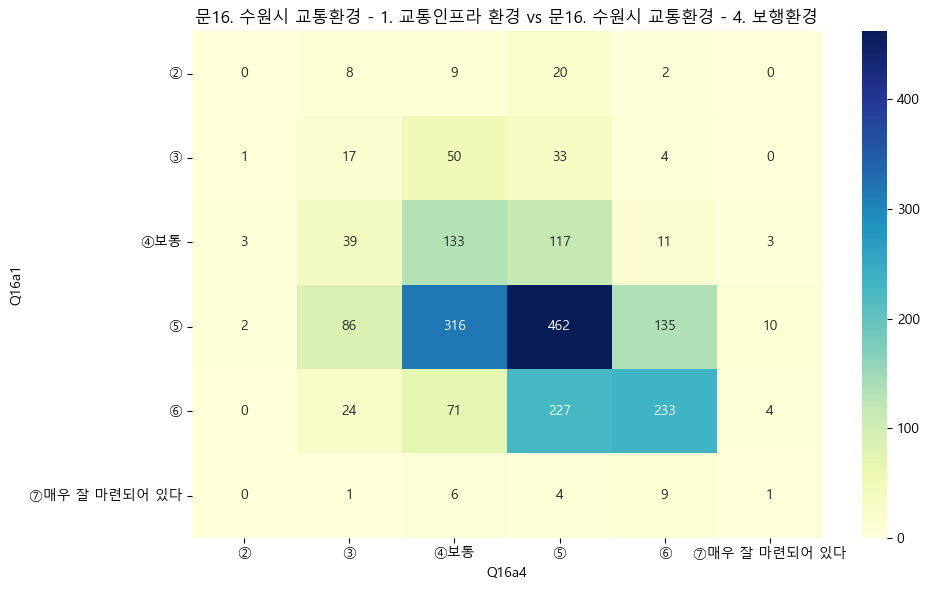

In [44]:
plot_heatmap("Q16a1", "Q16a4")

In [45]:
df["Q50a2"].value_counts()

Q50a2
⑤                            720
⑥                            605
⑦매우 중요하다                     377
④보통                          286
③                             47
②                              6
문50. 수원시 정책분야 중요도 - 2. 교통      1
Name: count, dtype: int64